In [27]:
import pymc3 as pm
import numpy as np
import graphviz as gv

INFO (theano.gof.compilelock): Refreshing lock /home/przemyslaw/.theano/compiledir_Linux-5.3--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


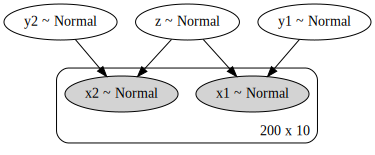

In [47]:
x_obs = np.random.random((200, 10))

n_obs = x_obs.size
theta = 4
with pm.Model() as style_transfer:
    y1 = pm.distributions.Normal("y1", 1, sd=100)
    y2 = pm.distributions.Normal("y2", 1, sd=100)
    z = pm.distributions.Normal("z", 1, sd=100)
    # useless distribution (could be constant, because this is something we observe anyway)
    x1 = pm.distributions.Normal("x1", y1 + z, sd=1, 
                              shape=n_obs,
                              observed=x_obs)
    x2 = pm.distributions.Normal("x2", y2 + z, sd=1, 
                              shape=n_obs,
                              observed=x_obs)

pm.model_to_graphviz(style_transfer)

In [53]:
from graphviz import Digraph

g = Digraph('style-transfer', filename="style_transfer_probabilistic_model")

x1 = "x1 ~ Sentence in style 1"
x2 = "x2 ~ Sentence in style 2"

g.edge('y1 ~ Style 1', x1)
g.edge("z ~ Content", x1)
g.edge("z ~ Content", x2)
g.edge("y2 ~ Style 2", x2)

g.view()

'style_transfer_probabilistic_model.pdf'